In [1]:
#hide
!pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 6.7 MB/s 
     |████████████████████████████████| 432 kB 9.2 MB/s 
     |████████████████████████████████| 4.9 MB 48.8 MB/s 
     |████████████████████████████████| 1.3 MB 44.8 MB/s 
     |████████████████████████████████| 115 kB 49.3 MB/s 
     |████████████████████████████████| 212 kB 51.0 MB/s 
     |████████████████████████████████| 163 kB 54.3 MB/s 
     |████████████████████████████████| 127 kB 12.1 MB/s 
     |████████████████████████████████| 6.6 MB 57.7 MB/s 


In [2]:
#hide
from fastbook import *

# Image Classification
- 이미지 분류

## From Dogs and Cats to Pet Breeds
- 개/고양이 예를 반려동물 품종으로 확장하기

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [6]:
(path/"images").ls()

(#7393) [Path('images/basset_hound_113.jpg'),Path('images/Abyssinian_105.jpg'),Path('images/japanese_chin_198.jpg'),Path('images/chihuahua_33.jpg'),Path('images/samoyed_75.jpg'),Path('images/leonberger_8.jpg'),Path('images/pomeranian_197.jpg'),Path('images/leonberger_157.jpg'),Path('images/British_Shorthair_159.jpg'),Path('images/leonberger_176.jpg')...]

In [7]:
first_name = (path/"images").ls()[0]
first_name.name

'basset_hound_113.jpg'

In [15]:
re.findall(r'(.+)_\d+.jpg$', first_name.name)

['basset_hound']

In [9]:
pets = DataBlock(blocks=[ImageBlock, CategoryBlock],
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=.75))
dataloaders = pets.dataloaders(path/"images")

## Presizing
- 사전 크기 조절
    - 텐서로 포장된 이미지를 GPU로 전달하려면 이미지가 모두 같은 크기여야만 한다. 그리고 수행될 데이터 증강의 계산 횟수도 최소화하는 편이 좋다. (손실되는 연산과 계산 횟수를 줄이도록) 가능한 한 적은 변형 작업으로 데이터 증강을 수행하고, (GPU에서 더 효율적으로 처리하도록) 이미지를 같은 크기로 변형하는 것이 성능상 권장 요구 사항이다.
    - 문제는 크기를 증강된 크기로 조정한 후 다양한 데이터 증강을 수행하면 불필요하게 채워진 빈 영역(squrious empty zones)이나 데이터의 저하(data degradation) 또는 두 가지가 모두 발생할 수 있다는 점이다.
        - 가령 이미지를 45도 회전하면, 새롭게 만들어진 이미지 경계의 모서리 부분이 텅 비게 된다. 이렇게 텅 빈 부분에는 학습할 정보가 없기 때문에 회전, 확대, 축소와 같은 작업으로 생겨난 빈 부분을 채우는 보간법(interpolating)이 필요하다. 그러나 보간된 픽셀은 원본 이미지 데이터에서 파생되었지만 품질이 좋지는 않다.

In [14]:
# dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
#                    get_y=parent_label,
#                    item_tfms=Resize(460))
# # Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
# dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
# dls1.train.get_idxs = lambda: Inf.ones
# x,y = dls1.valid.one_batch()
# _,axs = subplots(1, 2)

# x1 = TensorImage(x.clone())
# x1 = x1.affine_coord(sz=224)
# x1 = x1.rotate(draw=30, p=1.)
# x1 = x1.zoom(draw=1.2, p=1.)
# x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

# tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
#                        Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
# x = Pipeline(tfms)(x)
# #x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
# TensorImage(x[0]).show(ctx=axs[0])
# TensorImage(x1[0]).show(ctx=axs[1]);

### Checking and Debugging a DataBlock
- 데이터블록 검사와 디버깅

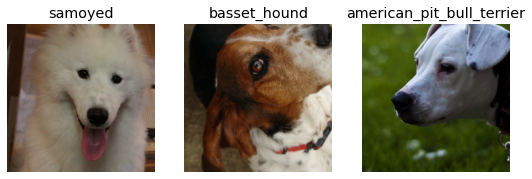

In [11]:
dataloaders.show_batch(nrows=1, ncols=3)

In [12]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Siamese_103.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x310
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Siamese_103.jpg
    applying partial gives
      Siamese
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(10)

Final sample: (PILImage mode=RGB size=500x310, TensorCategory(10))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipel

RuntimeError: ignored

In [13]:
learn = vision_learner(dataloaders, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.522100,0.315930,0.096752,01:16


epoch,train_loss,valid_loss,error_rate,time
0,0.498803,0.286274,0.096752,01:15
1,0.334349,0.215758,0.069012,01:15


## Cross-Entropy Loss
- 교차 엔트로피 손실
    - 교차 엔트로피 손실은 이전에 구현, 사용해본 `mnist_loss`함수와 유사하지만, 다음과 같은 두 가지 추가 장점이 있다.
        - 종속 변수(target)에 범주가 둘 이상(multi class)이더라도 작동한다.
        - 더 빠르고 안정적인 학습 결과를 도출한다.(알려진 사실)

### Viewing Activations and Labels
- 활설 및 레이블 확인

In [16]:
# Dataloaders 의 one_batch 메서드는 실제 배치(독립변수와 종속변수의 미니배치 형태)를 하나 가져온다.
x,y = dataloaders.one_batch()

In [20]:
x.shape

torch.Size([64, 3, 224, 224])

In [19]:
y, y.shape

(TensorCategory([26,  5, 32, 17,  4, 16, 21,  5,  8,  3, 30, 19, 35, 29, 27,  9, 15, 35,  3, 15, 14, 16, 13,  6, 18, 18, 26, 22, 27, 21, 23,  4,  1,  3, 21, 36,  3, 13,  0, 33, 32, 22, 20, 24,  5, 35,
                  2, 13, 19, 20, 16, 22, 12, 31,  3, 34,  0,  5, 30,  8,  6, 12, 22, 12], device='cuda:0'),
 torch.Size([64]))

- 배치 크기가 64이므로 해당 텐서는 행이 64개이다. 그리고 각 행의 값은 0~36 사이의 정수이다. 즉, 37종의 품종을 나타낸다. `Learner.get_preds` 메서드로는 예측값(신경망 마지막 계층의 활성)을 확인할 수 있다. 이 메서드는 데이터셋의 색인(index) 번호(0은 학습용, 1은 검증용 데이터셋) 또는 배치 형식의 반복자(iterator)를 입력받는다. 따라서 배치로 간단한 리스트를 만들어서 입력하면 예측값을 얻을 수 있다. 사실 `get_preds` 메서드는 예측값에 대응하는 레이블(타겟)도 함께 반환하지만, 필요 없다면 특별한 변수 `_`로 해당 반환값을 무시해도 된다.

In [26]:
preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]  # 배치 중 첫 번째 이미지에 대한 예측값 출력

TensorBase([3.0590e-06, 8.3777e-07, 9.9681e-09, 1.6343e-04, 7.6722e-09, 1.9563e-07, 1.0736e-08, 1.0135e-08, 1.6204e-09, 1.5924e-07, 1.6523e-05, 1.1729e-07, 4.1229e-07, 1.8490e-05, 3.4933e-08,
            3.1906e-06, 1.6526e-07, 7.5523e-05, 4.0086e-07, 2.3738e-06, 2.2973e-06, 1.2428e-07, 9.3370e-08, 6.3163e-08, 4.2308e-07, 6.4739e-07, 9.9967e-01, 5.7085e-08, 4.1621e-06, 1.3096e-05,
            1.8336e-08, 8.1718e-08, 8.1247e-07, 8.6078e-06, 7.6641e-06, 2.2120e-07, 8.2251e-06])

- 예측은 0~1 범위의 확률 37개로 구성된다. 그리고 이 값 37개를 모두 더하면 1이 되어야 한다.

In [25]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

### Softmax(activation function)
- 소프트맥스(활성화 함수)
    - 분류 모델에서는 마지막 계층의 모든 활성값이 0~1 사이의 값이 되도록 조정하고, 모두 더하면 1이 되도록 만들기 위해 소프트맥스 활성화 함수를 사용한다.

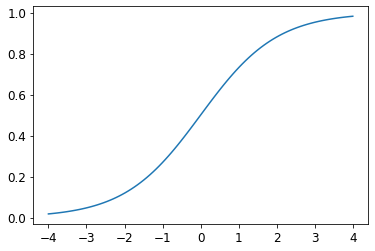

In [27]:
# 앞서 살펴본 sigmoid 함수의 형태
plot_function(torch.sigmoid, min=-4,max=4)

- 이 함수를 신경망의 활성값(예측값)으로 채운 단일 열에 적용하면 0~1 사이의 숫자로 채워진 열을 만들 수 있다. 따라서 마지막 계층에서 매우 유용한 활성화 함수이다.

In [37]:
#hide
torch.random.manual_seed(42);  # seed 값 고정

In [38]:
activations = torch.randn((6,2))*2
activations

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

- 여기에 시그모이드를 바로 적용할 수는 없다. 각 행을 더한 값이 1이 아니기 때문이다.(3이 될 확률과 7이 될 확률을 더하면 1이 되어야 한다.)

In [39]:
activations.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

- `04_mnist_basics.ipynb` 에서 만든 신경망은 이미지당 활성 하나를 출력했고, 이를 시그모이드 함수에 넣어서 단일 활성이 입력된 이미지가 숫자 3인지 아닌지에 대한 모델의 예측 확률을 표현했었다. `mnist_loss`에서 그랬듯이 이진 분류는 타겟을 불리언값으로 다루는 특별한 유형의 문제로, 다중 범주를 다루는 일반적인 예로 볼 수 있다. 단지 두 범주만 다루는 상황이 주어진 것이다. 다중 범주를 다룬 곰 품종 분류에 사용한 신경망에서는 범주당 활성 하나를 반환한다.
- 이진 분류도 출력을 두 개 내놓는 신경망으로 접근해본다면 각 활성이 나타내는 내용은 무엇일까?
    - 활성 쌍(두 활성)은 단순히 입력이 7과 3이 될 `상대적인` 가능성을 표현한다. 그리하여 `이 두 값이 절대적으로 큰지 작은지보다 둘 중 어느 값이 더 큰지가 종요하다!`
- 이는 단일 활성만 사용했던 것을 표현하는 또 다른 방식일 뿐이다. 따라서 "두 활성을 출력하는 신경망에도 시그모이드 함수를 적용하면 어떨까?"라고 생각해볼 수 있다. 그러기 위해선 우선 두 활성 간의 `차이`로부터 입력이 7이 아닌 3이라고 얼마나 확인할 수 있는지를 구한다. 그리고 `그 차이에 시그모이드 함수를 씌운다.`

In [40]:
(activations[:,0] - activations[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

- 이렇게 해서 3일 확률을 구했다. 그러면 7일 확률(두 번째 열)은 간단하게 1에서 3일 확률을 빼면 된다. 지금까지는 3과 7이라는 두 범주는 다우는 문제에만 적용되는 개념처럼 보였을 수도 있지만, 사실 둘 이상의 열(다중 범주)로 확장할 수도 있다. 그런데 이미 이와 같은 일을 하는 함수가 존재한다. 바로 소프트맥스 함수이다.
- 소프트맥스는 `시그모이드의 다중 범주 버전`쯤으로 볼 수 있다. `범주가 둘 이상`이고 `각 범주 확률의 합이 1이 되어야 하는 상황`에서는 언제나 사용할 수 있다. 그리고 단지 두 범주만 있을 때도 일관성을 유지할 목적으로 많이 사용한다. 모든 활성값이 0~1 사이이며 합하면 1이 되는 특성이 있는 함수를 직접 만들 수도 있다. 하지만 부드럽고 대칭적인 모양의 시그모이드 같은 함수를 만들기는 쉽지 않다. 또한 소프트맥스는 다른 여럿 손실함수와도 함께 잘 작동한다.

In [41]:
softmax_activations = torch.softmax(activations, dim=1)
softmax_activations

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

- 출력 활성이 세 개인 곰 분류 모델에 곰 이미지를 한 장 입력했다고 가정했을 때, 아래 처럼 소프트맥스가 계산된다.

In [56]:
from math import exp
teddy = exp(0.02)
grizzly = exp(-2.49)
brown = exp(1.25)

total_exp = teddy + grizzly + brown

conf_teddy = teddy / total_exp
conf_grizzly = grizzly / total_exp
conf_brown = brown / total_exp
total_confidences = conf_teddy + conf_grizzly + conf_brown

print("output: 0.02, -2.49, 1.25")
print(f"exp: {teddy:.2f}, {grizzly:.2f}, {brown:.2f}")
print(f"softmax: {conf_teddy:.2f}, {conf_grizzly:.2f}, {conf_brown:.2f}")
print("total:", total_confidences)

output: 0.02, -2.49, 1.25
exp: 1.02, 0.08, 3.49
softmax: 0.22, 0.02, 0.76
total: 1.0


- 이 함수가 실제로 하는 일은 무엇일까? 지수 함수로 모든 숫자를 양수화하고 이들을 합한 값(total_exp)으로 각 숫자를 나누면, 더했을 때 1이 되는 숫자가 3개 생긴다.
- 지수 함수는 `여러 활성값 중 하나가 다른 값보다 조금만 크더라도 그 값을 증폭시키는 좋은 특성`이 있다. 증폭된다는 말은 다시말해 `값이 1에 가까워진다는 의미`이다.

### Log Likelihood
- 로그 가능도

In [57]:
target = tensor([0,1,0,1,1,0])

In [58]:
softmax_activations

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [65]:
idx = range(6)
softmax_activations[idx, target]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [79]:
# 위 셀에서 출력한 모든 내용을 테이블 형식으로 표현해보면
# 왼쪽부터 소프트맥스를 적용한 활성값, 타겟(레이블), 인덱스, 바로 위 셀의 코드 실행 결과이다.
from IPython.display import HTML
df = pd.DataFrame(softmax_activations, columns=["3","7"])
df['target'] = target
df['index'] = idx
df['result'] = softmax_activations[range(6), target]
df
# t = df.style.hide_index()
# #To have html code compatible with our script
# html = t._repr_html_().split('</style>')[1]
# html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
# display(HTML(html))

,3,7,target,index,result
0,0.602469,0.397531,0,0,0.602469
1,0.502065,0.497935,1,1,0.497935
2,0.133188,0.866811,0,2,0.133188
3,0.996640,0.003360,1,3,0.003360
4,0.595949,0.404051,1,4,0.404051
5,0.366118,0.633882,0,5,0.366118


- 올바른 레이블에 대응하는 손실만을 선택하고 나머지는 신경 쓰지 않아도 된다. 소프트맥스의 정의에 따르면, 그 외의 열에 대한 활성을 모두 더한 값은 1에서 올바른 레이블의 활성을 뺀 값이기 때문이다. 따라서 올바른 레이블의 활성을 최대한 높게 만들면 그 외의 열에 대한 활성은 감소한다.
- 파이토치는 `softmax_activations[idx, target]`과 정확히 같은 일을 하는 `nll_loss` 함수를 제공한다.(단, 음수를 수용한다는 점이 다르다. 나중에 로그를 적용하면 음수가 생기기 때문이다.) 여기서 `NLL`은 `음의 로그 가능도(nagative log likelihood)`를 뜻한다.

In [66]:
-softmax_activations[idx, target]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [67]:
F.nll_loss(softmax_activations, target, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

- 이름에 '로그'가 있지만, 파이토치가 제공하는 `nll_loss` 함수는 로그를 적용하진 않는다. 이유는 이미 소프트맥스에 로그가 적용되었다고 가정하기 때문에 로그를 적용하는 과정은 포함되지 않는다. 우선 로그가 유용한 이유를 먼저 알아보겠다.

#### Taking the Log
- 로그 취하기
    - 파이토치의 `nll_loss`는 손실 함수로서 꽤 잘 작동한다. 하지만 조금 더 개선하는 방안이 있다. 문제는 `확률값이 0보다 작거나 1보다 클 수 없다`는 점이다. 즉 모델은 예측값이 0.99일 때와 0.999일 때의 차이를 잘 다루지 못한다. 두 수는 매우 근접하지만, 다른 시각에서 보면 `0.999는 0.99보다 신뢰도(confidence)가 10배나 높다고 해석할 수 있다.` 이를 해결하려면 `0~1 사이의 값을 음의 무한대와 양의 무한대로 변환`해야 한다. 그래야 차이가 극명하게 갈리게 된다. `로그(logarithm)`라는 수학 함수가 바로 이런 변환을 수행하는 함수이며, 파이토치에서는 `torch.log`로 제공된다. 0보다 작은 수에서 정의되지 않는 로그는 아래와 같은 모양을 띤다.
    - 일반적으로 `log(y, b)`는 밑이 b인 로그 y를 반환한다. 그러나 파이토치는 log를 이런 식으로 정의하지 않고 자연상수 e(2.718...)라는 특별한 수를 밑으로 사용한다.(자연로그 ln) 로그는 딥러닝의 여러 부분에서 매우 중요한 수학 개념이다. 다음 관계가 우리가 알아야 할 핵심 개념이다.
        - `log(a*b) = log(a) + log(b)`
    - 위 관계가 실제로 의미하는 바를 생각해본다면, `기본이 되는 신호가 곱셈 또는 지수적으로 증가할 때 로그가 선형적으로 증가한다`는 의미가 있다. 이를 사용하는 사례로는 지진의 심각도인 `리히터 척도(Richter scale)` 및 소음 수준인 `데시벨(dB)` 척도가 있다. 또한 복합 성장률을 더 명확하게 확인하려는 금융 차트에도 자주 사용한다. 컴퓨터 과학자들도 로그를 애용한다. 이유는 `정말 크거나 작은 숫자를 만들 수 있는 곱셉을 덧셈으로 대체하여 컴퓨터가 다루기 쉬운 척도로 변환`해주기 때문이다.

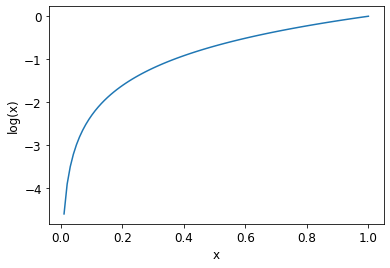

In [73]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')

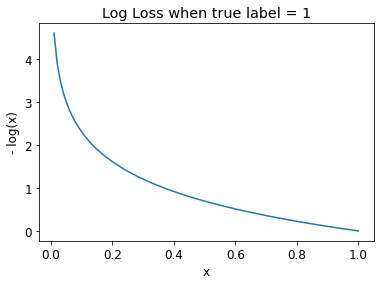

In [69]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [80]:
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
df
# t = df.style.hide_index()
# #To have html code compatible with our script
# html = t._repr_html_().split('</style>')[1]
# html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
# display(HTML(html))

,3,7,target,index,result,loss
0,0.602469,0.397531,0,0,0.602469,0.506720
1,0.502065,0.497935,1,1,0.497935,0.697285
2,0.133188,0.866811,0,2,0.133188,2.015990
3,0.996640,0.003360,1,3,0.003360,5.695763
4,0.595949,0.404051,1,4,0.404051,0.906213
5,0.366118,0.633882,0,5,0.366118,1.004798


### Negative Log Likelihood
- 음의 로그 가능도
    - `nll_loss`의 'nll'은 '음의 로그 가능도'를 의미하지만 실제로는 이미 로그가 적용되었다고 가정하기 때문에 로그를 전혀 사용하지 않는다. 파이토치에는 빠르고 정확한 방식으로 `log`와 `softmax`를 결합하는 `log_softmax`함수가 있다. `nll_loss`는 `log_softmax` 이후에 사용하도록 설계되었다.

- 소프트맥스 다음에 로그 가능도를 적용하는 조합을 교차 엔트로피 손실이라고 한다. 파이토치에서는 `nn.CrossEntropyLoss`(실제로는 `log_softmax` 다음에 `nll_loss`를 수행함)로 교차 엔트로피 손실을 사용할 수 있다.

In [81]:
loss_func = nn.CrossEntropyLoss()

- 위 셀의 코드에서 보다시피 `loss_func`는 클래스 인스턴스이다. 이처럼 인스턴스화하면 함수처럼 작동하는 객체를 얻는다.(클래스 기본 개념)

In [82]:
loss_func(activations, target)

tensor(1.8045)

- 파이토치의 모든 손실 함수는 바로 위에서 본 클래스 형식과 F 네임스페이스에서 사용할 수 있는 일반 함수, 두 가지 형식으로 제공된다.

In [83]:
F.cross_entropy(activations, target)

tensor(1.8045)

- 어느 쪽이든 잘 작동하며 어떤 상황에서도 사용할 수 있다. 다만 대부분 클래스 사용을 선호하고 파이토치의 공식 문서 및 예제에서도 자주 사용하므로, 여기서도 클래스를 사용한다.
- 기본적으로 파이토치의 손실 함수는 `모든 항목의 평균 손실`을 계산한다. `reduction="none"` 옵션을 사용하면 이런 행동을 비활성화 할 수 있다.

In [84]:
nn.CrossEntropyLoss(reduction="none")(activations, target)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

- TIP: 교차 엔트로피 손실의 흥미로운 특징은 그래디언트를 고려할 때 나타난다. `cross_entropy(a, b)`의 그래디언트는 `softmax(a) - b`이다. `softmax(a)`는 모델의 최종 활성이므로 그래디언트가 `오차값(예측과 타겟의 차이)에 비례`함을 의미한다. 이것은 `(a - b)**2`의 그래디언트가 `2*(a - b)`인 회귀의 평균 제곱 오차(MSE)와 같은 의미이다.(최종 활성화 함수에 y_range 등에 의한 덧셈이 없다고 가정) 그래디언트가 선형이기 때문에 갑작스러운 점프나 기하급수적인 증가가 없어서 모델은 더 원활히 학습될 수 있다.

## Model Interpretation
- 모델 해석

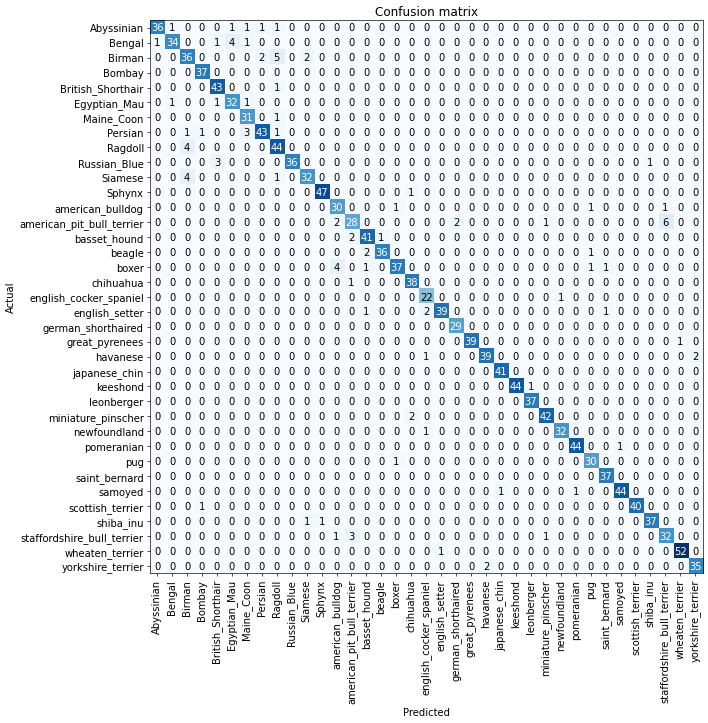

In [85]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [86]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Birman', 'Ragdoll', 5)]

## Improving Our Model

### The Learning Rate Finder

In [87]:
learn = vision_learner(dataloaders, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.918367,6.060201,0.463464,01:13


epoch,train_loss,valid_loss,error_rate,time
0,4.385722,3.162488,0.836265,01:16


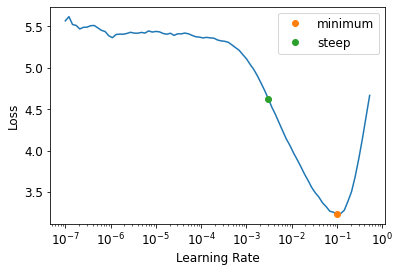

In [88]:
learn = vision_learner(dataloaders, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [89]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 3.02e-03


In [90]:
learn = vision_learner(dataloaders, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.292121,0.302876,0.092016,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.556284,0.355006,0.108931,01:14
1,0.335582,0.226074,0.069012,01:15


### Unfreezing and Transfer Learning

In [91]:
learn.fine_tune??

In [92]:
learn = vision_learner(dataloaders, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.146696,0.307460,0.098106,01:11
1,0.520944,0.252013,0.076455,01:09
2,0.307048,0.226504,0.072395,01:11


In [93]:
learn.unfreeze()

SuggestedLRs(valley=1.737800812406931e-05)

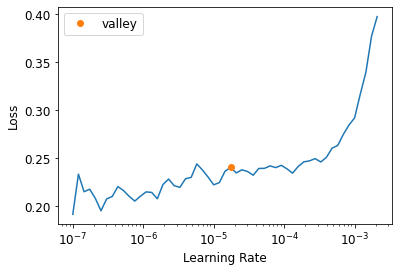

In [94]:
learn.lr_find()

In [95]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.250673,0.221007,0.066982,01:16
1,0.238393,0.218454,0.068336,01:16
2,0.228279,0.210728,0.065629,01:22
3,0.204710,0.202853,0.065629,01:25
4,0.198915,0.198315,0.063599,01:28
5,0.191791,0.201531,0.063599,01:28


### Discriminative Learning Rates

In [96]:
learn = vision_learner(dataloaders, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.169971,0.304989,0.093369,01:24
1,0.519109,0.240418,0.075778,01:19
2,0.331692,0.207336,0.064276,01:23


epoch,train_loss,valid_loss,error_rate,time
0,0.275036,0.203259,0.064953,01:17
1,0.249169,0.197732,0.060893,01:17
2,0.245088,0.198941,0.067659,01:14
3,0.209348,0.197112,0.060893,01:16
4,0.180718,0.189844,0.063599,01:29
5,0.172732,0.192281,0.062923,01:29
6,0.145622,0.185389,0.059540,01:25
7,0.163082,0.191701,0.059540,01:16
8,0.137841,0.185515,0.058863,01:16
9,0.137195,0.192323,0.060217,01:15


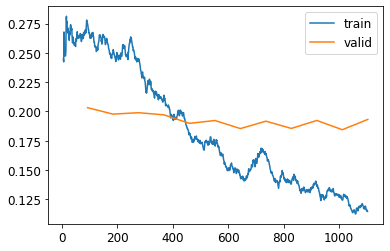

In [97]:
learn.recorder.plot_loss()

### Selecting the Number of Epochs

### Deeper Architectures

In [98]:
from fastai.callback.fp16 import *
learn = vision_learner(dataloaders, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.265600,0.285422,0.095399,01:08
1,0.566670,0.292551,0.093369,01:07
2,0.418290,0.244990,0.079838,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.275504,0.247073,0.075778,01:09
1,0.295446,0.336568,0.101489,01:10
2,0.245706,0.249007,0.069689,01:10
3,0.146425,0.258159,0.069012,01:09
4,0.080946,0.211934,0.056157,01:10
5,0.060202,0.218744,0.055480,01:11


## Conclusion

## Questionnaire

1. Why do we first resize to a large size on the CPU, and then to a smaller size on the GPU?
1. If you are not familiar with regular expressions, find a regular expression tutorial, and some problem sets, and complete them. Have a look on the book's website for suggestions.
1. What are the two ways in which data is most commonly provided, for most deep learning datasets?
1. Look up the documentation for `L` and try using a few of the new methods that it adds.
1. Look up the documentation for the Python `pathlib` module and try using a few methods of the `Path` class.
1. Give two examples of ways that image transformations can degrade the quality of the data.
1. What method does fastai provide to view the data in a `DataLoaders`?
1. What method does fastai provide to help you debug a `DataBlock`?
1. Should you hold off on training a model until you have thoroughly cleaned your data?
1. What are the two pieces that are combined into cross-entropy loss in PyTorch?
1. What are the two properties of activations that softmax ensures? Why is this important?
1. When might you want your activations to not have these two properties?
1. Calculate the `exp` and `softmax` columns of <<bear_softmax>> yourself (i.e., in a spreadsheet, with a calculator, or in a notebook).
1. Why can't we use `torch.where` to create a loss function for datasets where our label can have more than two categories?
1. What is the value of log(-2)? Why?
1. What are two good rules of thumb for picking a learning rate from the learning rate finder?
1. What two steps does the `fine_tune` method do?
1. In Jupyter Notebook, how do you get the source code for a method or function?
1. What are discriminative learning rates?
1. How is a Python `slice` object interpreted when passed as a learning rate to fastai?
1. Why is early stopping a poor choice when using 1cycle training?
1. What is the difference between `resnet50` and `resnet101`?
1. What does `to_fp16` do?

### Further Research

1. Find the paper by Leslie Smith that introduced the learning rate finder, and read it.
1. See if you can improve the accuracy of the classifier in this chapter. What's the best accuracy you can achieve? Look on the forums and the book's website to see what other students have achieved with this dataset, and how they did it.